In [1]:
from ROOT import TFile, TCanvas, TLegend, TLatex
from Plotter.PlotterTools.Kinematics import Kinematics

Welcome to JupyROOT 6.22/08


In [8]:
# get histograms
masspoints = ["MHc130_MA15", "MHc130_MA45", "MHc130_MA55", "MHc130_MA90", "MHc130_MA125"]
prompts = ["fake_mc", "VV", "ttX", "rare"]
signals = dict()
bkgs = dict()

for point in masspoints:
    path = "/root/workspace/HcToWA/Samples/SignalStudy/2017/Skim1E2Mu__ID__/Signals/"
    f = TFile(path + "SignalStudy_TTToHcToWA_AToMuMu_"+point+".root")
    h = f.Get("1e2mu/ACand/mass")
    signals[point] = h.Clone(point+"_ACandMass")
    signals[point].SetDirectory(0)
    f.Close()

for prompt in prompts:
    path = "/root/workspace/HcToWA/Samples/SignalStudy/2017/Skim1E2Mu__HcToWAID__/Backgrounds/"
    f = TFile(path + "SignalStudy_" + prompt + ".root")
    h = f.Get("1e2mu/ACand/mass")
    bkgs[prompt] = h.Clone(prompt+"_ACandMass")
    bkgs[prompt].SetDirectory(0)
    f.Close()


INFO: Storing histograms...
INFO: Histograms will be automatically normalized
INFO: Automatically set y axis range
Warning in <TCanvas::Constructor>: Deleting canvas with same name: cvs


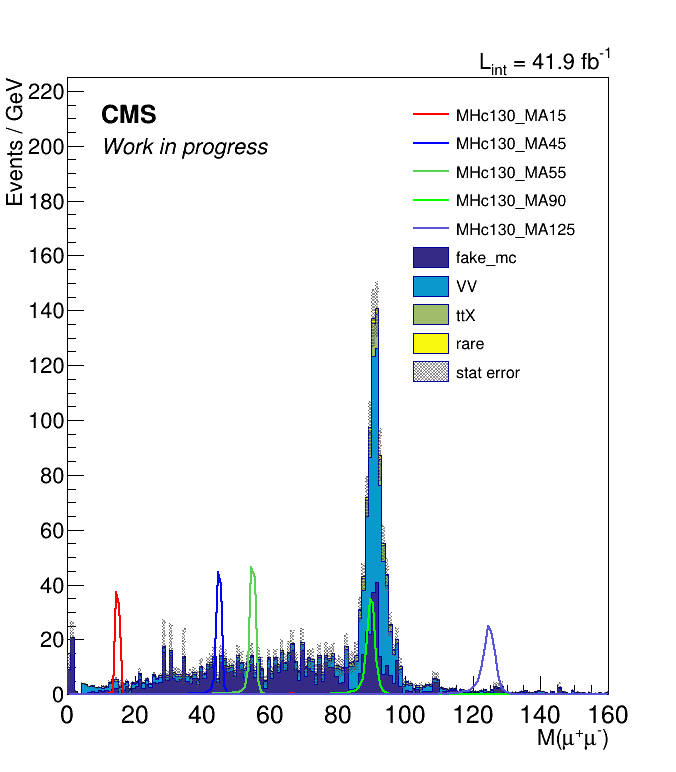

In [9]:
cvs_params = {
    "logy": False,
    "grid": False
}
info_params = {
    "info": "L_{int} = 41.9 fb^{-1}",
    "cms_text": "CMS",
    "extra_text": "Work in progress"
}
hist_params = {
    "x_title": "M(#mu^{+}#mu^{-})",
    "x_range": [0., 160.],
    "y_title": "Events / GeV",
}

plotter = Kinematics(cvs_params, hist_params, info_params)
plotter.get_hists(signals, bkgs)
plotter.combine()
plotter.draw()